# Independent Component Analysis Lab

In this notebook, we'll use Independent Component Analysis to retrieve original signals from three observations each of which contains a different mix of the original signals. This is the same problem explained in the ICA video.

## Dataset
Let's begin by looking at the dataset we have. We have three WAVE files, each of which is a mix, as we've mentioned. If you haven't worked with audio files in python before, that's okay, they basically boil down to being lists of floats.


Let's begin by loading our first audio file, **[ICA mix 1.wav](ICA mix 1.wav)** [click to listen to the file]:

In [1]:
import numpy as np
import wave

# Read the wave file
mix_1_wave, sr = sf.read('./src/datasets/ICA_mix_1.wav')

if mix_1_wave.dtype in (np.int16, np.int32, np.uint8):
    max_val = np.iinfo(mix_1_wave.dtype).max
    mix_1_wave = mix_1_wave.astype(np.float32) / max_val
else:
    mix_1_wave = mix_1_wave.astype(np.float32)
mix_1_wave = np.clip(mix_1_wave, -1.0, 1.0)

mix_2_wave, sr = sf.read('./src/datasets/ICA_mix_2.wav')

if mix_2_wave.dtype in (np.int16, np.int32, np.uint8):
    max_val = np.iinfo(mix_2_wave.dtype).max
    mix_2_wave = mix_2_wave.astype(np.float32) / max_val
else:
    mix_2_wave = mix_2_wave.astype(np.float32)
mix_2_wave = np.clip(mix_2_wave, -1.0, 1.0)


mix_3_wave, sr = sf.read('./src/datasets/ICA_mix_3.wav')

if mix_3_wave.dtype in (np.int16, np.int32, np.uint8):
    max_val = np.iinfo(mix_3_wave.dtype).max
    mix_3_wave = mix_3_wave.astype(np.float32) / max_val
else:
    mix_3_wave = mix_3_wave.astype(np.float32)
mix_3_wave = np.clip(mix_3_wave, -1.0, 1.0)

# mix_1_wave = wave.open('./src/datasets/ICA_mix_1.wav', 'r')


NameError: name 'sf' is not defined

Let's peak at the parameters of the wave file to learn more about it

In [112]:
mix_1_wave.getparams()

AttributeError: 'tuple' object has no attribute 'getparams'

So this file has only channel (so it's mono sound). It has a frame rate of 44100, which means each second of sound is represented by 44100 integers (integers because the file is in the common PCM 16-bit format). The file has a total of 264515 integers/frames, which means its length in seconds is:

In [106]:
264515/44100

5.998072562358277

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [107]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')
signal_1 = signal_1

/var/folders/qz/71chp1j54j3c5wv05ssrqpdr0000gn/T/ipykernel_64430/3856644488.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_1 = np.fromstring(signal_1_raw, 'int16')


In [108]:
signal_1

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

signal_1 is now a list of ints representing the sound contained in the first file.

In [114]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

If we plot this array as a line graph, we'll get the familiar wave form representation:

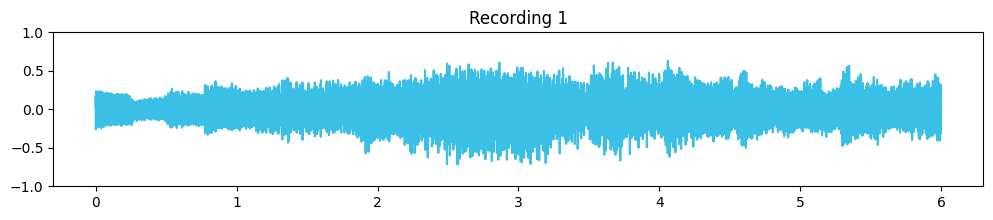

In [63]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-1, 1)
plt.show()

In the same way, we can now load the other two wave files, **[ICA mix 2.wav](ICA mix 2.wav)** and **[ICA mix 3.wav](ICA mix 3.wav)**

/var/folders/qz/71chp1j54j3c5wv05ssrqpdr0000gn/T/ipykernel_64430/2498362119.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2 = np.fromstring(signal_raw_2, 'int16')
/var/folders/qz/71chp1j54j3c5wv05ssrqpdr0000gn/T/ipykernel_64430/2498362119.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3 = np.fromstring(signal_raw_3, dtype = 'int16')


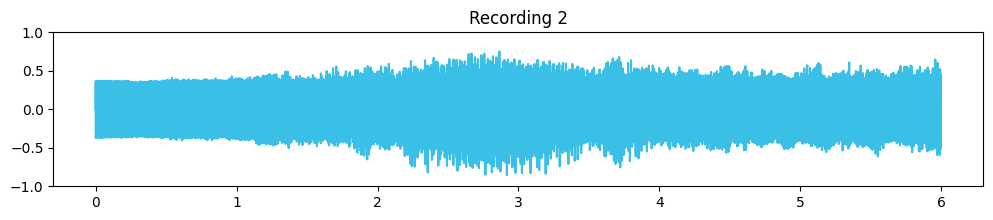

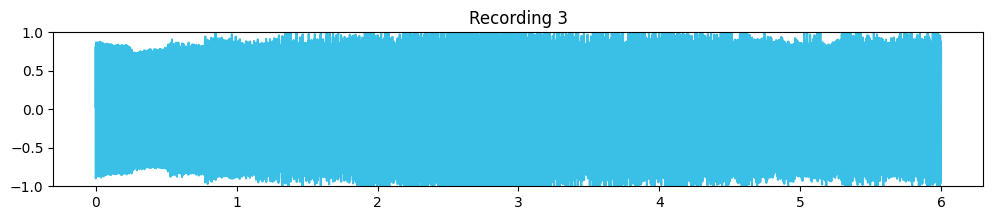

In [64]:

mix_2_wave = wave.open('./src/datasets/ICA_mix_2.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'int16')
signal_2 = signal_2 / 32767.0  


mix_3_wave = wave.open('./src/datasets/ICA_mix_3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, dtype = 'int16')
signal_3 = signal_3 / 32767.0  

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-1, 1)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-1, 1)
plt.show()


Now that we've read all three files, we're ready to [zip](https://docs.python.org/3/library/functions.html#zip) them to create our dataset.

* Create dataset ```X``` by zipping signal_1, signal_2, and signal_3 into a single list

In [123]:
X = list(zip(mix_1_wave, mix_2_wave, mix_3_wave))

# Let's peak at what X looks like
X[:10]

[(np.float32(0.026824951), np.float32(0.0047912598), np.float32(0.026824951)),
 (np.float32(0.03869629), np.float32(0.027435303), np.float32(0.07885742)),
 (np.float32(0.044555664), np.float32(0.0491333), np.float32(0.12454224)),
 (np.float32(0.053588867), np.float32(0.07095337), np.float32(0.17340088)),
 (np.float32(0.059295654), np.float32(0.09222412), np.float32(0.21810913)),
 (np.float32(0.06762695), np.float32(0.113464355), np.float32(0.26516724)),
 (np.float32(0.07345581), np.float32(0.1338501), np.float32(0.3086548)),
 (np.float32(0.0814209), np.float32(0.15429688), np.float32(0.3534851)),
 (np.float32(0.08746338), np.float32(0.17364502), np.float32(0.3953247)),
 (np.float32(0.0947876), np.float32(0.19281006), np.float32(0.43722534))]

In [122]:
signal_2

array([0.00479141, 0.02743614, 0.0491348 , ..., 0.40852077, 0.42774743,
       0.44544816])

We are now ready to run ICA to try to retrieve the original signals.

* Import sklearn's [FastICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) module
* Initialize FastICA look for three components
* Run the FastICA algorithm using fit_transform on dataset X

In [134]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)

ica_result = ica.fit_transform(X)

```ica_result``` now contains the result of FastICA, which we hope are the original signals. It's in the shape:

In [166]:
W = ica.components_

def calculate_expression(W, X):
    n = X.shape[1]
    try:
        term1 = np.sum(np.log(1 - np.tanh(W.T @ X) ** 2)) / n
        term2 = np.log(np.linalg.det(W))
        return term1 + term2
    except (RuntimeWarning, ValueError) as e:
        print(f"计算过程中出现错误: {e}")
        return None

calculate_expression(W, np.array(X).T)

ica_result = W @ np.array(X).T

In [173]:
W

array([[ -3.6525534 , -10.77950803,   5.5461135 ],
       [ -1.91838477,  -0.40331102,   2.33958407],
       [-10.53640631,  15.24877586,  -4.79483466]])

Let's split into separate signals and look at them

In [169]:
result_signal_1 = ica_result[0,:]
result_signal_2 = ica_result[1,:]
result_signal_3 = ica_result[2,:]

In [170]:
result_signal_1

array([-8.52765812e-04,  2.72883872e-04, -1.64937416e-03, ...,
       -1.40866466e+00, -1.43901551e+00, -1.45994085e+00])

Let's plot to see how the wave forms look

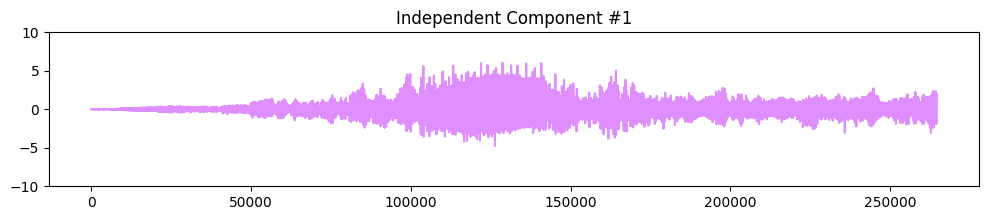

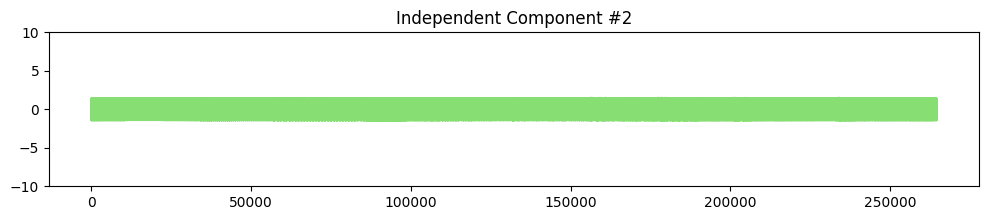

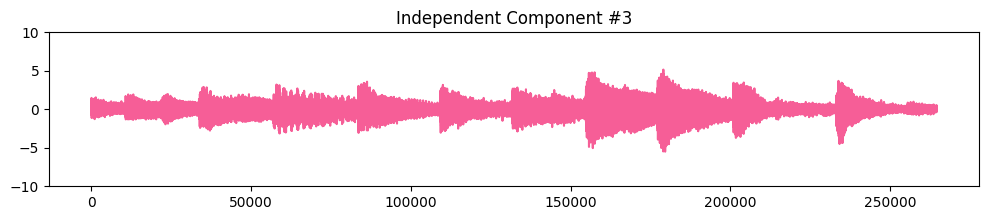

In [171]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-10, 10)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-10, 10)
plt.show()

# Plot Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-10, 10)
plt.show()

Do some of these look like musical wave forms? 

The best way to confirm the result is to listen to resulting files. So let's save as wave files and verify. But before we do that, we'll have to:
* convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won't
* Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. A basic mapping can be done by multiplying by 32767.
* The sounds will be a little faint, we can increase the volume by multiplying by a value like 100

In [101]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767)
result_signal_2_int = np.int16(result_signal_2*32767)
result_signal_3_int = np.int16(result_signal_3*32767)



if signal.dtype == np.int16:
    sf.write(output_path, (signal_float * 32767).astype(np.int16), sr, subtype='PCM_16')
elif signal.dtype == np.int32:
    sf.write(output_path, (signal_float * 2147483647).astype(np.int32), sr, subtype='PCM_32')
else:
    sf.write(output_path, signal_float, sr, subtype='FLOAT')


# 幅值安全限制（防止削波）
# result_signal_1 = np.clip(result_signal_1, -1.0, 1.0)

# # 保存为原始格式
# if signal.dtype == np.int16:
#     sf.write(output_path, (result_signal_1 * 32767).astype(np.int16), sr, subtype='PCM_16')
    
    
    

# Write wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [132]:
result_signal_1

array([-0.00820198, -0.09801825, -0.18493008, ..., -0.99080257,
       -1.05363356, -1.11289807])

In [102]:
result_signal_1_int

array([11017, 11977, 10337, ...,  6672,  6855,  9027], dtype=int16)

In [84]:
import numpy as np
import soundfile as sf

# 设置音频参数
sample_rate = 44100  # 采样率，单位：Hz

# 保存音频文件
sf.write('result_signal_1.wav', signal_1, sample_rate)



In [77]:
mix_1_wave

The resulting files we have now are: [note: make sure to lower the volume on your speakers first, just in case some problem caused the file to sound like static]
* [result_signal_1.wav](result_signal_1.wav)
* [result_signal_2.wav](result_signal_2.wav)
* [result_signal_3.wav](result_signal_3.wav)



Music:
* Piano - The Carnival of the Animals - XIII. The Swan (Solo piano version). Performer: Markus Staab
* Cello - Cello Suite no. 3 in C, BWV 1009 - I. Prelude. Performer: European Archive

In [ ]:
# Read the wave file
mix_1_wave = wave.open('./src/datasets/ICA_mix_1.wav', 'r')
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')
signal_1 = signal_1


sample_rate = 44100  # 采样率，单位：Hz
sf.write('result_signal_1.wav', signal_1, sample_rate)

In [85]:
import wave
import numpy as np
import soundfile as sf

# Open wave file
mix_wave = wave.open('./src/datasets/ICA_mix_1.wav', 'r')

# Get parameters
n_channels = mix_wave.getnchannels()
sampwidth = mix_wave.getsampwidth()
framerate = mix_wave.getframerate()
n_frames = mix_wave.getnframes()

# Read and convert
raw_data = mix_wave.readframes(n_frames)
signal = np.frombuffer(raw_data, dtype=np.int16)

# If stereo, reshape
if n_channels == 2:
    signal = signal.reshape(-1, 2)  # shape: (samples, 2)

# Write back using soundfile
sf.write('result_signal_1.wav', signal, framerate)

In [86]:
import wave
import numpy as np
import soundfile as sf

# Open the wave file
with wave.open('./src/datasets/ICA_mix_1.wav', 'rb') as wf:
    n_channels = wf.getnchannels()
    sampwidth = wf.getsampwidth()
    framerate = wf.getframerate()
    n_frames = wf.getnframes()

    # Read audio frames
    raw_data = wf.readframes(n_frames)

# Convert to int16 audio samples
audio = np.frombuffer(raw_data, dtype=np.int16)

# If stereo (2 channels), reshape
if n_channels == 2:
    audio = audio.reshape(-1, 2)

# Write back to wav file
sf.write('result_signal_1.wav', audio, framerate, subtype='PCM_16')

In [88]:
framerate

44100

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# 假设你有混合信号 mix (shape: n_samples x 2)
mix = np.stack([signal1, signal2], axis=1)

# 归一化
scaler = StandardScaler()
mix_norm = scaler.fit_transform(mix)

# ICA 拆分
ica = FastICA(n_components=2)
sources = ica.fit_transform(mix_norm)

# 💡 Normalize sources to int16 range for saving
sources_scaled = sources / np.max(np.abs(sources))  # [-1, 1]
sources_int16 = (sources_scaled * 32767).astype(np.int16)

# 保存第一个分离出的声源
sf.write('result_ica_source1.wav', sources_int16[:, 0], samplerate=44100)

In [91]:
import wave

# 打开原始的音频文件
with wave.open('./src/datasets/ICA_mix_1.wav', 'rb') as wf:
    n_channels = wf.getnchannels()
    sample_rate = wf.getframerate()
    print(f"Channels: {n_channels}, Sample rate: {sample_rate}")

# # 用来检查数据的范围
# import numpy as np
# raw_data = wf.readframes(wf.getnframes())
# signal = np.frombuffer(raw_data, dtype=np.int16)
# print(f"Signal range: {np.min(signal)}, {np.max(signal)}")

Channels: 1, Sample rate: 44100


In [94]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# 假设 X 是混合信号数据 (n_samples, n_channels)
# 假设你有 n_channels = 2 作为输入数据

# 对数据进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ICA 拆分
ica = FastICA(n_components=2)
S = ica.fit_transform(X_scaled)

# ICA 输出的源信号，缩放到 int16 范围
S_int16 = np.int16(S / np.max(np.abs(S)) * 32767)

# 保存第一个源信号
import soundfile as sf
sf.write('result_signal_1.wav', S_int16[:, 0], samplerate=sample_rate)

In [98]:
import soundfile as sf
import numpy as np

# 读取音频（自动转换为浮点型）
signal, sample_rate = sf.read('./src/datasets/ICA_mix_1.wav')

# 强制归一化到安全范围 [-1, 1]
max_val = np.max(np.abs(signal))
if max_val > 1.0:
    signal = signal / max_val  # 避免削波

# 保存时指定原始位深度（如 16-bit）
sf.write('result_signal_1.wav', signal, sample_rate, subtype='PCM_16')

# 读取时保留原始位深度信息
signal, sample_rate = sf.read('./src/datasets/ICA_mix_1.wav', dtype='int16')  # 直接读取为 int16

# 处理过程中转换为浮点运算
signal_float = signal.astype('float32') / 32768.0  # int16转float32 [-1,1]

# 保存时转回原始格式
signal_int16 = np.clip(signal_float * 32767, -32768, 32767).astype('int16')
sf.write('result_signal_1.wav', signal_int16, sample_rate, subtype='PCM_16')

# 读取多声道音频
signal, sample_rate = sf.read('stereo.wav')
left = signal[:, 0]  # 左声道
right = signal[:, 1]  # 右声道

# 处理单声道（示例：左声道降噪）
processed_left = your_processing_function(left)

# 合并保存
processed_signal = np.column_stack((processed_left, right))
sf.write('processed_stereo.wav', processed_signal, sample_rate)



LibsndfileError: Error opening 'stereo.wav': System error.

In [103]:
import soundfile as sf
import numpy as np

def safe_read_write(input_path, output_path):
    # 读取音频（保留原始位深度）
    signal, sr = sf.read(input_path)
    
    # 转换为浮点并归一化
    if signal.dtype in (np.int16, np.int32, np.uint8):
        max_val = np.iinfo(signal.dtype).max
        signal_float = signal.astype(np.float32) / max_val
    else:
        signal_float = signal.astype(np.float32)
    
    # 幅值安全限制（防止削波）
    signal_float = np.clip(signal_float, -1.0, 1.0)
    
    # 保存为原始格式
    if signal.dtype == np.int16:
        sf.write(output_path, (signal_float * 32767).astype(np.int16), sr, subtype='PCM_16')
    elif signal.dtype == np.int32:
        sf.write(output_path, (signal_float * 2147483647).astype(np.int32), sr, subtype='PCM_32')
    else:
        sf.write(output_path, signal_float, sr, subtype='FLOAT')

# 使用示例

safe_read_write("./src/datasets/ICA_mix_1.wav", 'result_signal_1.wav')

In [3]:
! git clone https://github.com/pierreablin/faster-ica.git
% cd faster-ica
! pip install -e .

Cloning into 'faster-ica'...
remote: Enumerating objects: 174, done.
remote: Total 174 (delta 0), reused 0 (delta 0), pack-reused 174 (from 1)
Receiving objects: 100% (174/174), 44.13 MiB | 2.10 MiB/s, done.
Resolving deltas: 100% (85/85), done.


UsageError: Line magic function `%` not found.


In [5]:
cd faster-ica

/Users/caleblee/codes/Julia/MyPack/ICAmm/faster-ica


In [6]:
! pip install -e .

import fasterica

Obtaining file:///Users/caleblee/codes/Julia/MyPack/ICAmm/faster-ica
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      /Users/caleblee/codes/Julia/MyPack/ICAmm/faster-ica/setup.py:3: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.core import setup
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/Users/caleblee/codes/

ModuleNotFoundError: No module named 'fasterica'